# Agent Based Simulation of COVID-19 Health and Economical Effects

Prof. Dr. Petrônio Cândido de Lima e Silva <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)


<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-nc-sa.svg" alt="Creative Commons BY-NC-SA" />

Experiments for the post published on Towards Data Science, available at https://towardsdatascience.com/agent-based-simulation-of-covid-19-health-and-economical-effects-6aa4ae0ff397.


## Installing the package

In [1]:
#!pip3 install git+https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git

## Common imports

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

warnings.simplefilter('ignore')

## Simulations

### Scenario 1 - Do Nothing

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


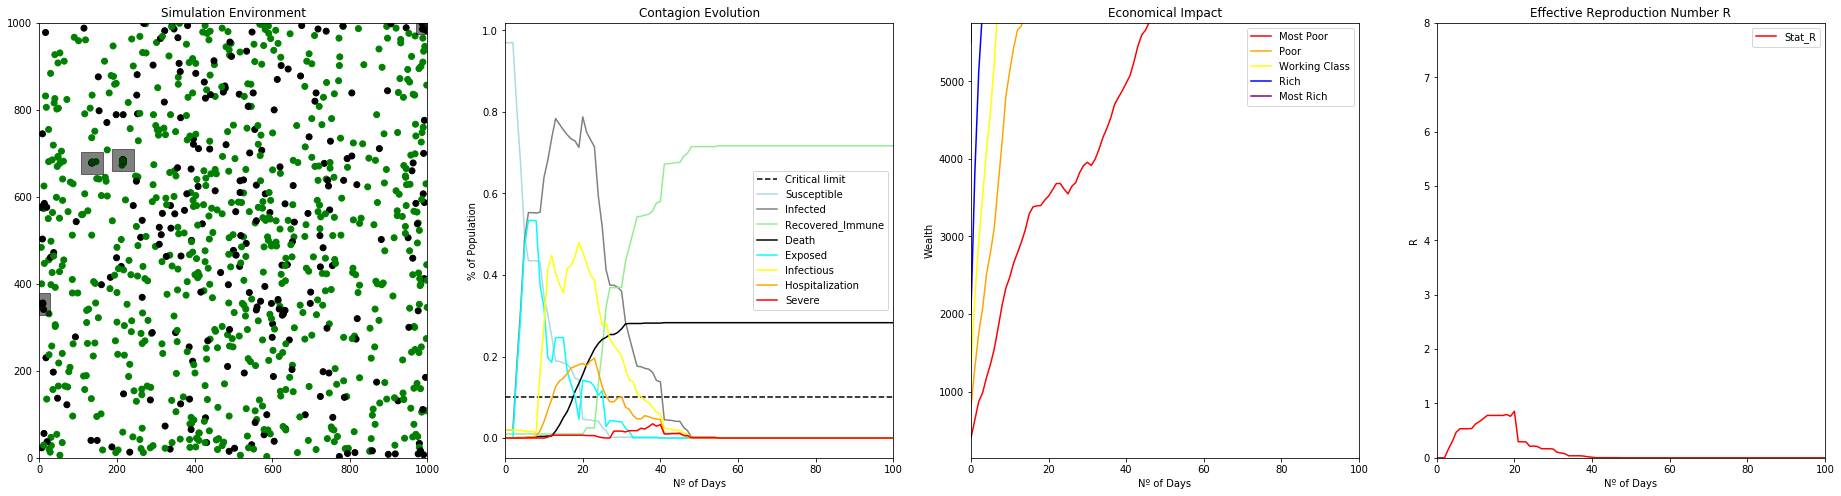

In [6]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=1000,                       
    # Height of simulation environment
    height=1000,
    # Size of population
    population_size=1000,
    # percentage of people with medical preconditions
    condition_perc=0.05,
    # Minimal distance between agents for contagion
    contagion_distance=5., 
    # percentage to get infected on contact
    contagion_rate=0.5,               
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.10,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        },
    store_infection_rate = 0.6, 
    stores_per_thousand = 4,
    days_without_shopping = 4 
)

anim = execute_simulation(sim, iterations=100)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

save_gif(anim, 'do_nothing_reduced.gif')

In [13]:
from covid_abs.experiments import batch_experiment

out = batch_experiment(3, 100, "do_nothing_reduced.csv",
                 # Percentage of infected in initial population
                initial_infected_perc = 0.02,
                # Percentage of immune in initial population
                initial_immune_perc = 0.01,
                # Length of simulation environment       
                length=1000,                       
                # Height of simulation environment
                height=1000,
                # Size of population
                population_size=1000,
                # percentage of people with medical preconditions
                condition_perc=0.05,
                # Minimal distance between agents for contagion
                contagion_distance=5.,
                # percentage to get infected on contact
                contagion_rate=0.5,                      
                # Maximum percentage of population which Healthcare System can handle simutaneously
                critical_limit=0.10,
                # Mobility ranges for agents, by Status
                amplitudes = {                        
                    Status.Susceptible : 5, 
                    Status.Recovered_Immune : 5, 
                    Status.Infected : 5 
                    },
                store_infection_rate = 0.6, 
                stores_per_thousand = 4,
                days_without_shopping = 4
                 )

[[0, 'Susceptible', 0.968, 0.9693333333333333, 0.0009428090415820641, 0.97], [0, 'Infected', 0.02, 0.020666666666666667, 0.0009428090415820625, 0.022], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Exposed', 0.0, 0.0006666666666666666, 0.0009428090415820634, 0.002], [0, 'Infectious', 0.016, 0.018333333333333337, 0.0016996731711975948, 0.02], [0, 'Hospitalization', 0.0, 0.0016666666666666668, 0.0016996731711975948, 0.004], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 627.4057219220153, 672.7110639910363, 52.54769820757327, 746.3780503240789], [0, 'Q2', 1289.1469322193084, 1371.043754482306, 65.47788232441854, 1449.4182592912491], [0, 'Q3', 2004.7467867585428, 2082.3331202785116, 56.66067805271164, 2138.473312555445], [0, 'Q4', 3233.234991400786, 3310.2297264739277, 78.1717462467413, 3417.4300120355715], [0, 'Q5', 8460.682109649968, 8978.41843993862, 480.8451555126276, 9619.097965042774], [0, 'Stat_R', 0.0, 0.0006666666666666666, 0.000942809041582

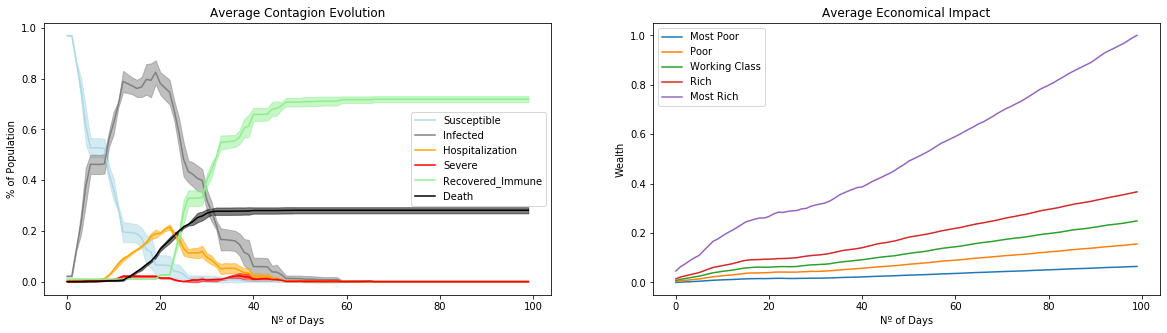

In [14]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('do_nothing_reduced.csv')

plot_batch_results(df)

### Scenario 2 - Lockdown without Masks

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


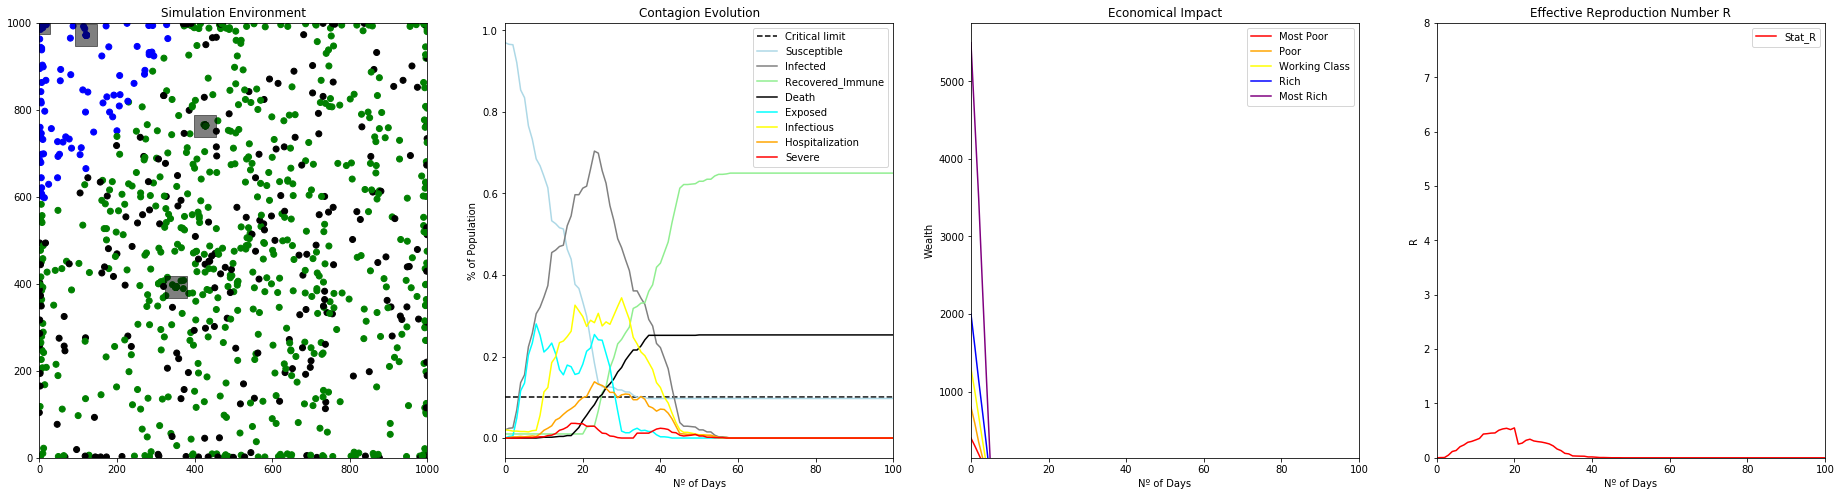

In [9]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=1000,                       
    # Height of simulation environment
    height=1000,
    # Size of population
    population_size=1000,
    # Minimal distance between agents for contagion
    condition_perc=0.05,
    # percentage of people with medical preconditions
    contagion_distance=5.,  
    # percentage to get infected on contact
    contagion_rate=0.5,                     
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.10,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 1, 
        Status.Recovered_Immune : 1, 
        Status.Infected : 0.5
        },
    store_infection_rate = 0.6, 
    stores_per_thousand = 4,
    days_without_shopping = 10
)

anim = execute_simulation(sim, iterations=100)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

save_gif(anim, 'lockdown_without_masks.gif')

In [15]:
from covid_abs.experiments import batch_experiment

out = batch_experiment(3, 100, "lockdown_without_masks.csv",
                 # Percentage of infected in initial population
                initial_infected_perc = 0.02,
                # Percentage of immune in initial population
                initial_immune_perc = 0.01,
                # Length of simulation environment       
                length=1000,                       
                # Height of simulation environment
                height=1000,
                # Size of population
                population_size=1000,
                # Minimal distance between agents for contagion
                condition_perc=0.05,
                # percentage of people with medical preconditions
                contagion_distance=5.,      
                # percentage to get infected on contact
                contagion_rate=0.5,                 
                # Maximum percentage of population which Healthcare System can handle simutaneously
                critical_limit=0.10,
                # Mobility ranges for agents, by Status
                amplitudes = {                        
                    Status.Susceptible : 1, 
                    Status.Recovered_Immune : 1, 
                    Status.Infected : 0.5 
                    },
                store_infection_rate = 0.6, 
                stores_per_thousand = 4,
                days_without_shopping = 10
                 )

[[0, 'Susceptible', 0.968, 0.969, 0.0008164965809277268, 0.97], [0, 'Infected', 0.02, 0.021, 0.0008164965809277254, 0.022], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Exposed', 0.0, 0.001, 0.000816496580927726, 0.002], [0, 'Infectious', 0.017, 0.018333333333333337, 0.0009428090415820626, 0.019], [0, 'Hospitalization', 0.001, 0.0016666666666666668, 0.0009428090415820634, 0.003], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 278.3272379993252, 297.532376962879, 13.629449030023057, 308.55438271865137], [0, 'Q2', 583.7820881609189, 622.34398120451, 28.475829493474343, 651.6770221191728], [0, 'Q3', 959.8142122745714, 977.7197857521788, 14.851110603897247, 996.1792048117513], [0, 'Q4', 1488.8654131929238, 1528.5611054306426, 28.728432622438476, 1555.9038347866992], [0, 'Q5', 4155.54337984533, 4200.781601940721, 32.01482139020853, 4224.997781930711], [0, 'Stat_R', 0.0, 0.001, 0.000816496580927726, 0.002], [1, 'Susceptible', 0.967, 0.9683333333333333,

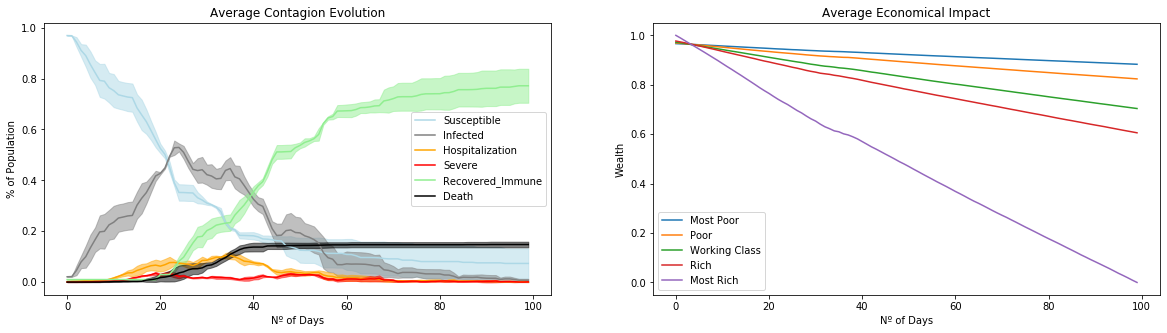

In [16]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('lockdown_without_masks.csv')

plot_batch_results(df)

### Scenario 3 - Masks but without Lockdown

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


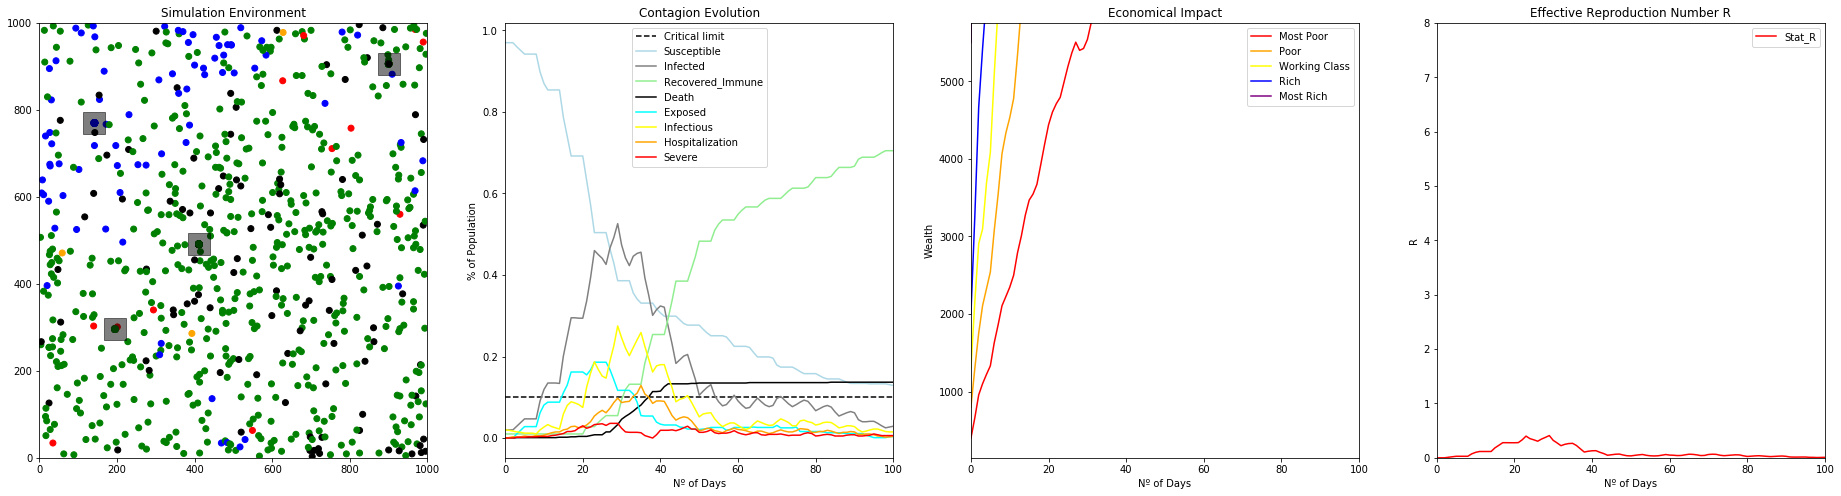

In [10]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=1000,                       
    # Height of simulation environment
    height=1000,
    # Size of population
    population_size=1000,
    # percentage of people with medical preconditions
    condition_perc=0.05,
    # Minimal distance between agents for contagion
    contagion_distance=1,      
    # percentage to get infected on contact
    contagion_rate=0.2,       
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.10,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        },
    store_infection_rate = 0.05, 
    stores_per_thousand = 4,
    days_without_shopping = 3
)

anim = execute_simulation(sim, iterations=100)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

save_gif(anim, 'masks_without_lockdown.gif')

In [17]:
from covid_abs.experiments import batch_experiment

out = batch_experiment(3, 100, "masks_without_lockdown.csv",
                 # Percentage of infected in initial population
                initial_infected_perc = 0.02,
                # Percentage of immune in initial population
                initial_immune_perc = 0.01,
                # Length of simulation environment       
                length=1000,                       
                # Height of simulation environment
                height=1000,
                # Size of population
                population_size=1000,
                # Minimal distance between agents for contagion
                condition_perc=0.05,
                # percentage of people with medical preconditions
                contagion_distance=1,        
                # percentage to get infected on contact
                contagion_rate=0.2,   
                # Maximum percentage of population which Healthcare System can handle simutaneously
                critical_limit=0.10,
                # Mobility ranges for agents, by Status
                amplitudes = {                        
                    Status.Susceptible : 5, 
                    Status.Recovered_Immune : 5, 
                    Status.Infected : 5 
                    },
                store_infection_rate = 0.05, 
                stores_per_thousand = 4,
                days_without_shopping = 3
                 )

[[0, 'Susceptible', 0.97, 0.9700000000000001, 1.1102230246251565e-16, 0.97], [0, 'Infected', 0.02, 0.02, 0.0, 0.02], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Exposed', 0.0, 0.0, 0.0, 0.0], [0, 'Infectious', 0.019, 0.01933333333333333, 0.00047140452079103207, 0.02], [0, 'Hospitalization', 0.0, 0.0006666666666666666, 0.0004714045207910317, 0.001], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 607.2486221265763, 662.7601038049049, 51.753676660071356, 731.8259054423816], [0, 'Q2', 1367.8879044977125, 1396.0742105464203, 19.932860027017703, 1410.524402478261], [0, 'Q3', 2038.8395845609102, 2131.289855063554, 68.28981626413403, 2201.700918477234], [0, 'Q4', 3156.469590353953, 3265.4619321865125, 77.24455174212723, 3326.3285997203416], [0, 'Q5', 8958.005529374117, 9327.77213577779, 261.82228416012964, 9529.414177469596], [0, 'Stat_R', 0.0, 0.0, 0.0, 0.0], [1, 'Susceptible', 0.97, 0.9700000000000001, 1.1102230246251565e-16, 0.97], [1, 'Infected', 0.

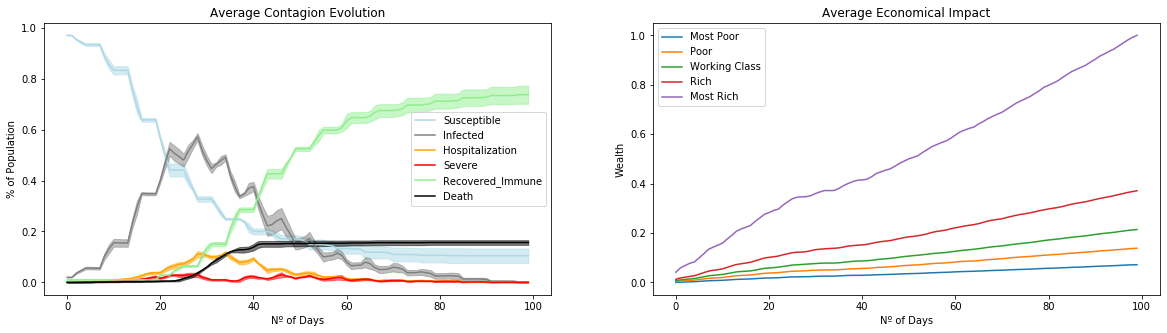

In [18]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('masks_without_lockdown.csv')

plot_batch_results(df)

## Scenario 4: more medical resources (for 50% population)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


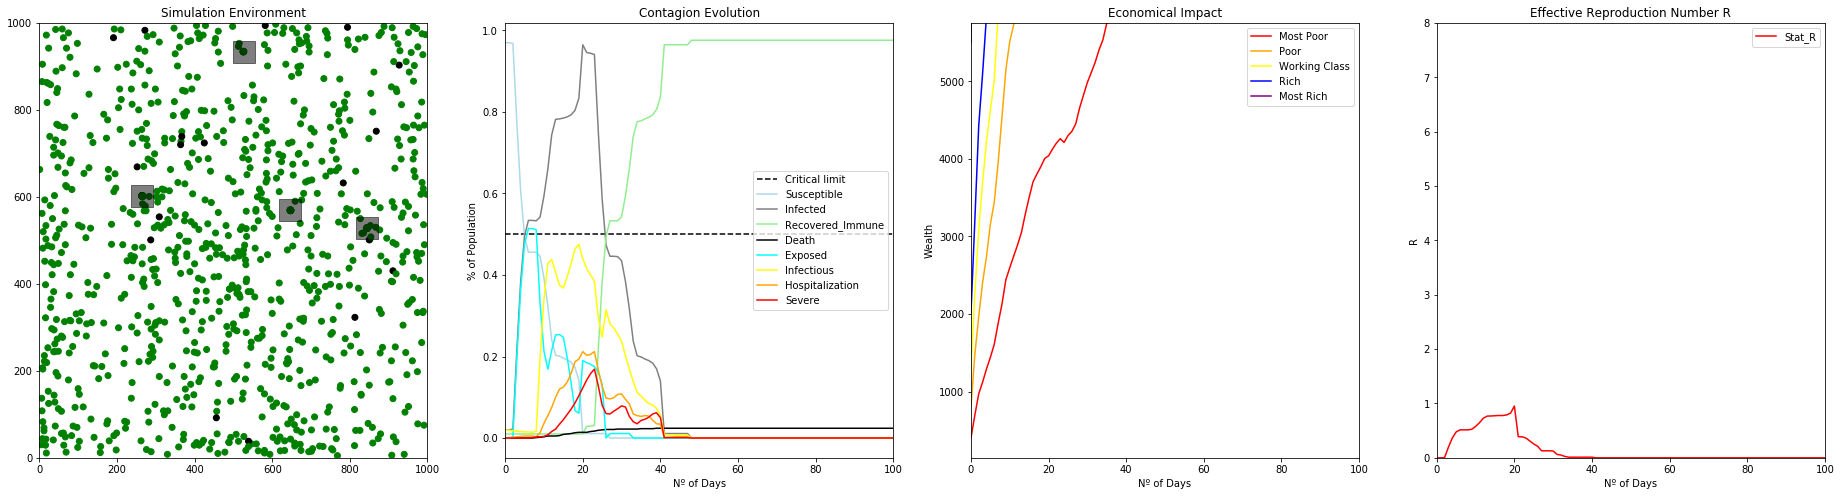

In [12]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=1000,                       
    # Height of simulation environment
    height=1000,
    # Size of population
    population_size=1000,
    # percentage of people with medical preconditions
    condition_perc=0.05,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.5,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        },
    store_infection_rate = 0.6, 
    stores_per_thousand = 4,
    days_without_shopping = 4 
)

anim = execute_simulation(sim, iterations=100)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

save_gif(anim, 'higher_critical_limit.gif')

In [19]:
from covid_abs.experiments import batch_experiment

batch_experiment(3, 100, "higher_critical_limit.csv",
                  # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=1000,                       
    # Height of simulation environment
    height=1000,
    # Size of population
    population_size=1000,
    # percentage of people with medical preconditions
    condition_perc=0.05,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.5,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        },
    store_infection_rate = 0.6, 
    stores_per_thousand = 4,
    days_without_shopping = 4 
)

[[0, 'Susceptible', 0.96, 0.964, 0.0032659863237109073, 0.968], [0, 'Infected', 0.022, 0.026, 0.003265986323710904, 0.03], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Exposed', 0.002, 0.006000000000000001, 0.003265986323710904, 0.01], [0, 'Infectious', 0.017, 0.017666666666666667, 0.00047140452079103045, 0.018], [0, 'Hospitalization', 0.002, 0.0023333333333333335, 0.0004714045207910317, 0.003], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 638.9981726876742, 651.7692166335597, 9.10785224576299, 659.6055267354762], [0, 'Q2', 1148.0683243162227, 1282.0903711798603, 121.03131189647172, 1441.3046261436175], [0, 'Q3', 2071.058364489538, 2230.3889078182874, 112.81302110308154, 2317.16051943587], [0, 'Q4', 2977.3310034728697, 3214.7011756710867, 217.1584437164297, 3502.1412188202157], [0, 'Q5', 8890.977227137371, 9072.313963396162, 174.21869464847228, 9307.4329161896], [0, 'Stat_R', 0.002, 0.006000000000000001, 0.003265986323710904, 0.01], [1, 'Suscep

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.960000,0.964000,0.003266,0.968000
1,0,Infected,0.022000,0.026000,0.003266,0.030000
2,0,Recovered_Immune,0.010000,0.010000,0.000000,0.010000
3,0,Death,0.000000,0.000000,0.000000,0.000000
4,0,Exposed,0.002000,0.006000,0.003266,0.010000
5,0,Infectious,0.017000,0.017667,0.000471,0.018000
6,0,Hospitalization,0.002000,0.002333,0.000471,0.003000
7,0,Severe,0.000000,0.000000,0.000000,0.000000
8,0,Q1,638.998173,651.769217,9.107852,659.605527
9,0,Q2,1148.068324,1282.090371,121.031312,1441.304626


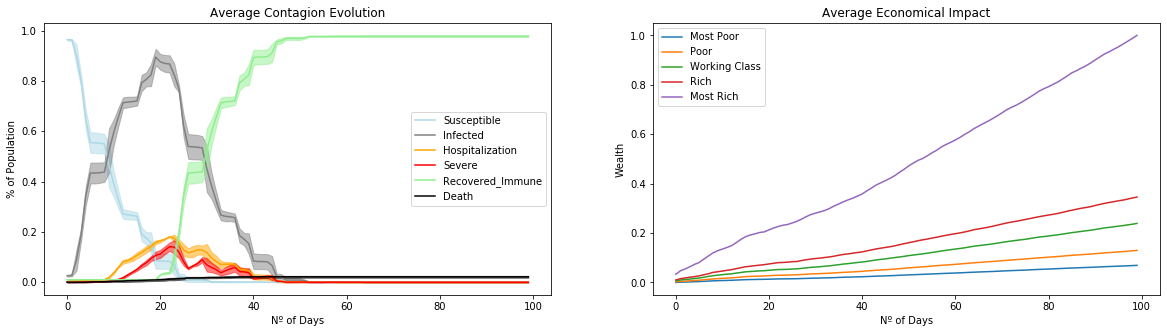

In [20]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('higher_critical_limit.csv')

plot_batch_results(df)